<a href="https://colab.research.google.com/github/Meghana-creator/Weather_Classification_Project/blob/main/CAP_STONE_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weather Classification using CNN

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
import cv2
import tqdm as tqdm
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#getting the dataset
foggy = "/content/CNN_Weather_Classification/dataset/foggy"
sunrise = "/content/CNN_Weather_Classification/dataset/sunrise"
shine = "/content/CNN_Weather_Classification/dataset/shine"
rainy = "/content/CNN_Weather_Classification/dataset/rainy"
cloudy = "/content/CNN_Weather_Classification/dataset/cloudy"

In [ ]:

print("Number of Images in Each Directory:")
print(f"Foggy: {len(os.listdir(foggy))}")
print(f"Sunrise: {len(os.listdir(sunrise))}")
print(f"Shine: {len(os.listdir(shine))}")
print(f"Rainy: {len(os.listdir(rainy))}")
print(f"Cloudy: {len(os.listdir(cloudy))}")

Number of Images in Each Directory:
Foggy: 360
Sunrise: 350
Shine: 250
Rainy: 300
Cloudy: 340


In [ ]:
x = []
y = []
dataset =[]
def create_dataset(directory,dir_name):
    for i in tqdm.tqdm(os.listdir(directory)):
        full_path = os.path.join(directory,i)
        try:
            img = cv2.imread(full_path)
            img = cv2.resize(img,(150,150))
        except:
            continue
        x.append(img)
        y.append(dir_name)
    return x,y

In [ ]:
x,y= create_dataset(foggy,"foggy")
x,y= create_dataset(sunrise,"sunrise")
x,y= create_dataset(shine,"shine")
x,y= create_dataset(rainy,"rainy")
x,y= create_dataset(cloudy,"cloudy")

100%|██████████| 340/340 [00:00<00:00, 439.23it/s]


In [ ]:

x =  np.array(x)
y = np.array(y)
x.shape,y.shape

((1598, 150, 150, 3), (1598,))

# Let's see some of the Images in random

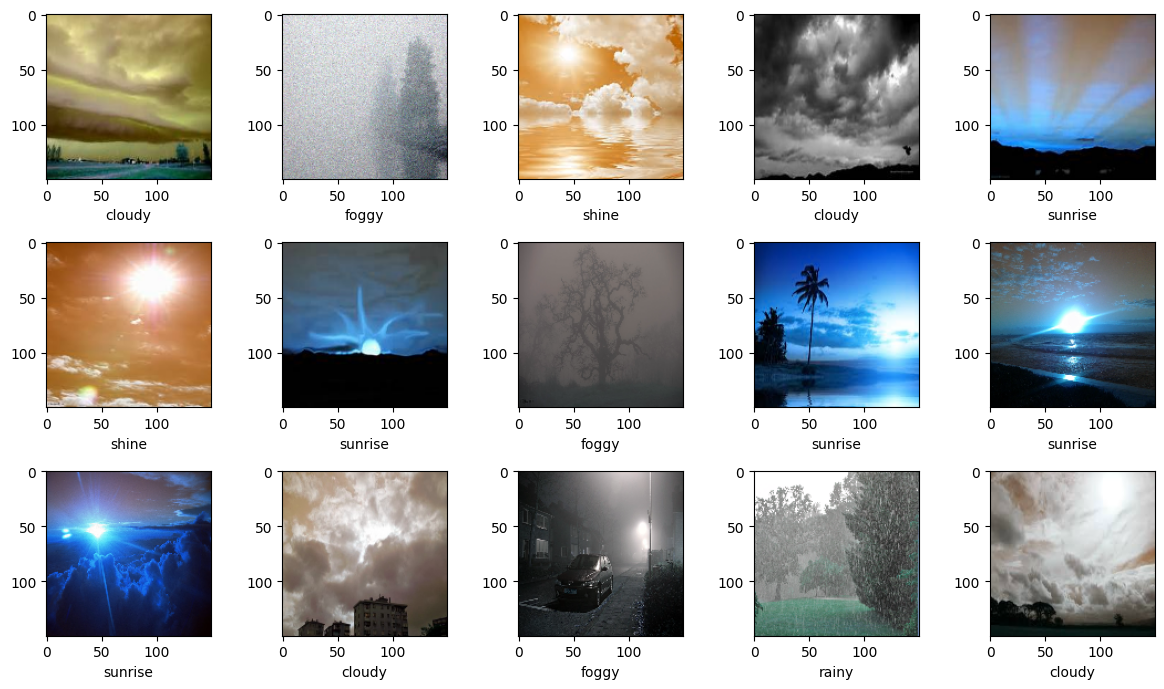

In [ ]:
fig = plt.figure(figsize=(12,7))
for i in range(15):
    sample =  random.choice(range(len(x)))
    image = x[sample]
    category = y[sample]
    plt.subplot(3,5,i+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(image)
    plt.xlabel(category)

plt.tight_layout()
plt.show()

In [ ]:
#preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
img_size = 150

x_train = np.array(x_train)/255.0
x_test = np.array(x_test)/255.0


x_train = x_train.reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)

x_test = x_test.reshape(-1,img_size,img_size,3)
y_test = np.array(y_test)

In [ ]:

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train_lb = lb.fit_transform(y_train)
y_test_lb = lb.fit_transform(y_test)

In [ ]:

y_train_lb.shape,y_test_lb.shape

((1278, 5), (320, 5))

In [ ]:
#building the CNN model using tenserflow-keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, AveragePooling2D, Dropout, BatchNormalization

model = Sequential()

model.add(Conv2D(input_shape=(150, 150, 3), filters=64, kernel_size=(2, 2), activation="relu", padding="valid"))
model.add(Conv2D(64, kernel_size=(1, 1), activation="relu", padding="valid"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, kernel_size=(2, 2), activation="relu", padding="valid"))
model.add(Conv2D(128, kernel_size=(1, 1), activation="relu", padding="valid"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, (2, 2), activation='relu', padding='valid'))
model.add(Conv2D(256, (1, 1), activation='relu', padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(5, activation="softmax"))

In [ ]:
#getting the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 149, 149, 64)      832       
                                                                 
 conv2d_1 (Conv2D)           (None, 149, 149, 64)      4160      
                                                                 
 batch_normalization (Batch  (None, 149, 149, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 73, 73, 128)       32896     
                                                                 
 conv2d_3 (Conv2D)           (None, 73, 73, 128)       1

In [ ]:
#compile the model
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics="accuracy")


In [ ]:
#train the model for 50 epochs
batch_size=50
history =  model.fit(x_train,y_train_lb,epochs=50,validation_data=(x_test,y_test_lb),batch_size=batch_size)

Epoch 1/50
26/26 [==============================] - 15s 315ms/step - loss: 1.7925 - accuracy: 0.6002 - val_loss: 2.7684 - val_accuracy: 0.2688
Epoch 2/50
26/26 [==============================] - 4s 152ms/step - loss: 1.9596 - accuracy: 0.5696 - val_loss: 2.8484 - val_accuracy: 0.2844
Epoch 3/50
26/26 [==============================] - 4s 152ms/step - loss: 1.8939 - accuracy: 0.5728 - val_loss: 1.9149 - val_accuracy: 0.3438
Epoch 4/50
26/26 [==============================] - 4s 155ms/step - loss: 1.5947 - accuracy: 0.5376 - val_loss: 1.4974 - val_accuracy: 0.4344
Epoch 5/50
26/26 [==============================] - 4s 154ms/step - loss: 1.5243 - accuracy: 0.5626 - val_loss: 1.4200 - val_accuracy: 0.5344
Epoch 6/50
26/26 [==============================] - 4s 154ms/step - loss: 1.3307 - accuracy: 0.5383 - val_loss: 1.3257 - val_accuracy: 0.5594
Epoch 7/50
26/26 [==============================] - 4s 154ms/step - loss: 1.1526 - accuracy: 0.5798 - val_loss: 1.4917 - val_accuracy: 0.5375
Epoch

In [ ]:
loss,accuracy = model.evaluate(x_test,y_test_lb)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

y_pred = model.predict(x_test)

10/10 [==============================] - 0s 33ms/step - loss: 0.8392 - accuracy: 0.8656
Loss: 0.8391764760017395
Accuracy: 0.8656250238418579
10/10 [==============================] - 0s 25ms/step


In [ ]:
#saving the trained model
model.save('./model')

# Testing the model using 40 weather images (8 of each weather class)

In [ ]:
test = "/content/CNN_Weather_Classification/dataset/test_dataset"
test_x = []
test_y = []
dataset =[]
def create_dataset(directory,dir_name):
    for i in tqdm.tqdm(os.listdir(directory)):
        full_path = os.path.join(directory,i)
        try:
            img = cv2.imread(full_path)
            img = cv2.resize(img,(150,150))
        except:
            continue
        test_x.append(img)
        test_y.append(i.split('_')[0])
    return test_x, test_y


test_x, test_y = create_dataset(test, "test")

100%|██████████| 40/40 [00:02<00:00, 13.60it/s]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
actual_y = test_y
test_y = le.fit_transform(test_y)

img_size = 150
test_x = np.array(test_x)/255.0
test_y = np.array(test_y)

In [ ]:
pred_y = np.argmax(model.predict(test_x), axis=-1)

2/2 [==============================] - 1s 649ms/step


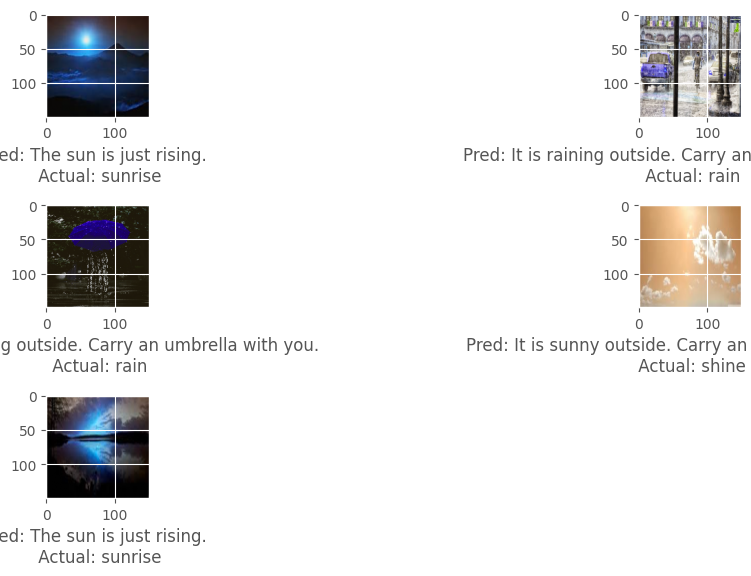

In [ ]:
plt.figure(figsize=(12,9))
plt.style.use("ggplot")
for i in range(5):
    sample = random.choice(range(len(test_x)))
    plt.subplot(5, 2, i + 1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(test_x[sample])
    if pred_y[sample] == 0:
        label = 'It is cloudy outside, it might rain!. It is wise to carry an umbrella.'
    elif pred_y[sample] == 1:
        label = 'It is foggy outside.'
    elif pred_y[sample] == 2:
        label = 'It is raining outside. Carry an umbrella with you.'
    elif pred_y[sample] == 3:
        label = 'It is sunny outside. Carry an umbrella with you.'
    elif pred_y[sample] == 4:
        label = 'The sun is just rising.'
    plt.xlabel(f"Pred: {label} \n Actual: {actual_y[sample]}")

plt.tight_layout()
plt.show()

# getting the classifiaction report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.58      0.88      0.70         8
           1       0.75      0.38      0.50         8
           2       1.00      1.00      1.00         8
           3       1.00      0.75      0.86         8
           4       0.80      1.00      0.89         8

    accuracy                           0.80        40
   macro avg       0.83      0.80      0.79        40
weighted avg       0.83      0.80      0.79        40



# confusion matrix

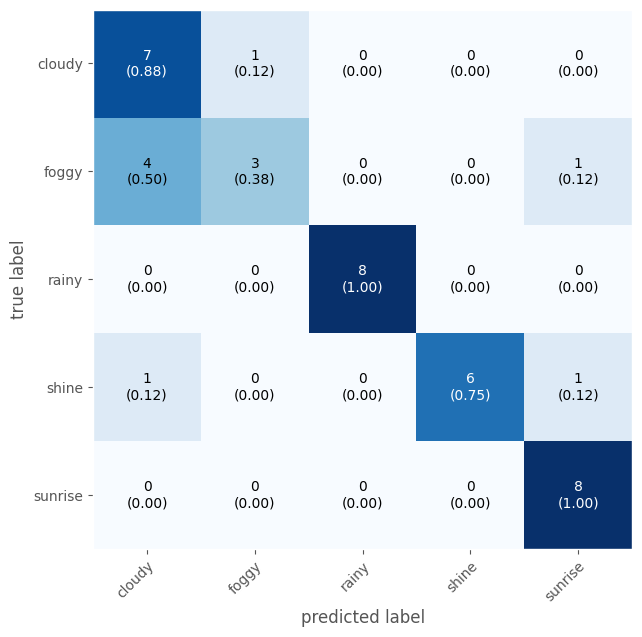

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(test_y,pred_y)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ["cloudy","foggy","rainy","shine","sunrise"],
                      show_normed = True);